In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='once')
warnings.filterwarnings('ignore')

**Exploration of normality of DAILY OBX change**

In [2]:
import scipy.stats
from scipy.stats import norm
dfOBXlast=pd.read_excel("./Data/OBXlast.xlsx")
dfOBXlast.dropna()
dfOBXlast.rename(columns={'Last':'Last Call OBX'}, inplace=True)

dfOBXlast.head()

Date  Last Call OBX    Change  1MOChange
0 2019-02-06         786.44 -0.006995   0.016834
1 2019-02-05         791.98  0.018152   0.030271
2 2019-02-04         777.86  0.002242   0.010890
3 2019-02-01         776.12  0.001600   0.036457
4 2019-01-31         774.88  0.000155   0.044270

In [3]:
dfOBXlast.tail()

Date  Last Call OBX    Change  1MOChange
5793 1996-01-05        79.4104 -0.003761        NaN
5794 1996-01-04        79.7102 -0.000591        NaN
5795 1996-01-03        79.7573  0.022724        NaN
5796 1996-01-02        77.9852       NaN        NaN
5797 1995-12-29            NaN       NaN        NaN

[]

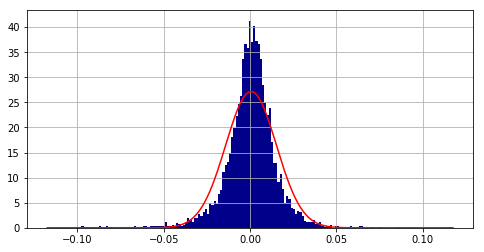

In [4]:
mean = dfOBXlast["Change"].mean()
variance = dfOBXlast["Change"].var()
sigma = dfOBXlast["Change"].std()
x = np.linspace(-sigma*8, sigma*8, 1000)

fig, axes = plt.subplots(1, 1, figsize=(8,4))

dfOBXlast["Change"].hist(bins = 175, color = 'darkblue', density = True)

plt.plot(x,norm.pdf(x,mean,sigma), color = 'red')

plt.plot()

In [5]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.distributions.mixture_rvs import mixture_rvs
kde = sm.nonparametric.KDEUnivariate(dfOBXlast["Change"].dropna())
kde.fit()

In [6]:
dfOBXlast=pd.read_excel("./Data/OBXlast.xlsx")
dfOBXlast.dropna()
dfOBXlast.rename(columns={'Last':'Last Call OBX'}, inplace=True)

[]

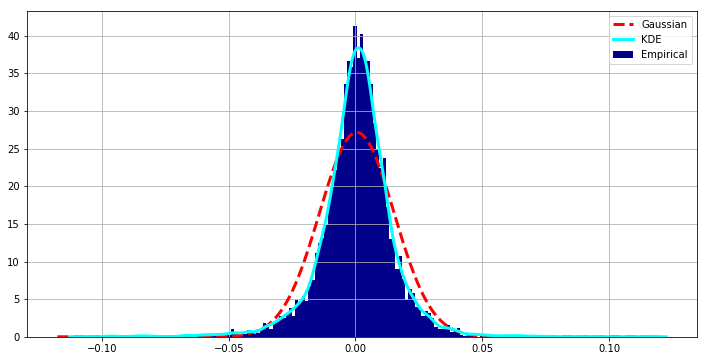

In [7]:
mean = dfOBXlast["Change"].mean()
variance = dfOBXlast["Change"].var()
sigma = dfOBXlast["Change"].std()
x = np.linspace(-sigma*8, sigma*8, 1000)


fig, axes = plt.subplots(1, 1, figsize=(12,6))
dfOBXlast["Change"].hist(bins = 175, color = 'darkblue', density = True, label= "Real", ax = axes)
axes.plot(x,norm.pdf(x,mean,sigma),lw = 3, color = 'red',ls = '--',label ="Gaussian")
axes.plot(kde.support, kde.density, lw=3,color = 'cyan', ls ='-', zorder=10, label ="KDE")
plt.legend(["Gaussian","KDE","Empirical"])
plt.plot()

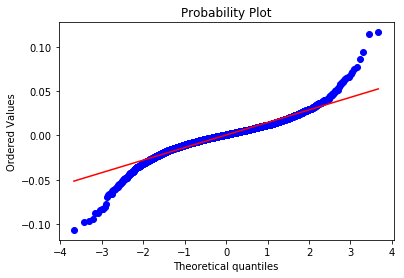

In [8]:
import numpy as np 
import pylab 
import scipy.stats as stats

stats.probplot(dfOBXlast["Change"].dropna(), dist="norm", plot = pylab)
pylab.show()

**Exploration of normality of MONTHLY OBX change**

[]

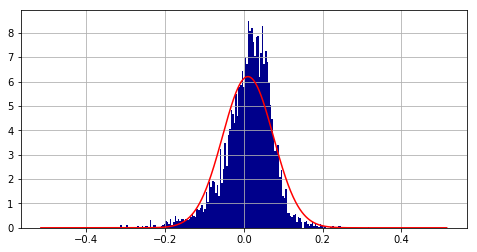

In [9]:
import scipy.stats
from scipy.stats import norm
fig, axes = plt.subplots(1, 1, figsize=(8,4))
dfOBXlast["1MOChange"].hist(bins = 175, color = 'darkblue', density = True)

mean = dfOBXlast["1MOChange"].mean()
variance = dfOBXlast["1MOChange"].var()
sigma = dfOBXlast["1MOChange"].std()
x = np.linspace(-sigma*8, sigma*8, 1000)

plt.plot(x,norm.pdf(x,mean,sigma), color = 'red')


plt.plot()

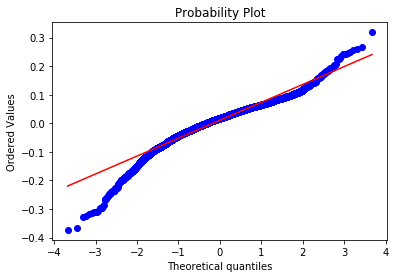

In [10]:
import numpy as np 
import pylab 
import scipy.stats as stats

stats.probplot(dfOBXlast["1MOChange"].dropna(), dist="norm", plot = pylab)
pylab.show()

In [11]:
from scipy import stats
stats.normaltest(dfOBXlast["1MOChange"].dropna())

NormaltestResult(statistic=999.9788466149084, pvalue=7.200330770023066e-218)

**Some more plotting and exploration of data**

[]

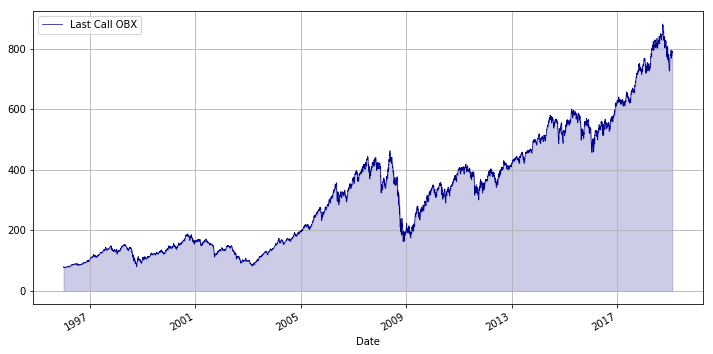

In [12]:
fig, axes = plt.subplots(1, 1, figsize=(12,6))
dfOBXlast.plot("Date","Last Call OBX", color = 'darkblue', ax = axes, legend ="Last Call", grid = True, linewidth = 0.7)
plt.fill_between(dfOBXlast["Date"].values,dfOBXlast["Last Call OBX"].values, 0, color = "darkblue",alpha=0.2)
plt.plot()

**Empirical V@R OBX, just for testing**

In [13]:
quantile1d = np.quantile(dfOBXlast["Change"].dropna(),0.01)
quantile1d

-0.043114373734739767

In [14]:
quantile1m = np.quantile(dfOBXlast["1MOChange"].dropna(),0.01)
quantile1m

-0.19481990584363312

In [15]:
dfOBXlast["Next Day V@R"] = dfOBXlast["Last Call OBX"]*(1+quantile1d)
dfOBXlast["Next Month V@R"] = dfOBXlast["Last Call OBX"]*(1+quantile1m)

**Plot, dont know if this is actually a rigourous calculation but done for testing**

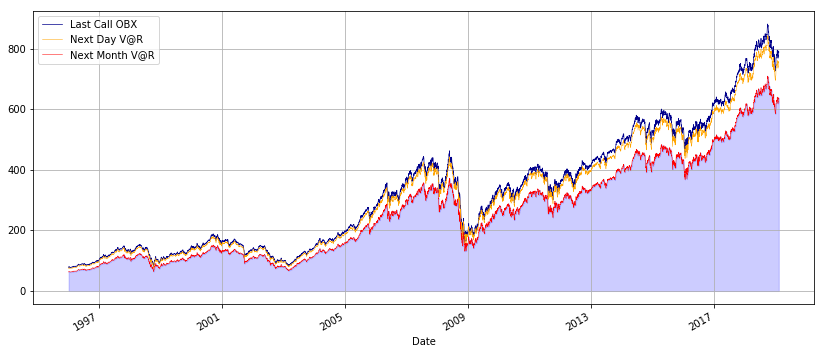

In [16]:
fig, axes = plt.subplots(1, 1, figsize=(14,6))
dfOBXlast.plot("Date","Last Call OBX", color = 'darkblue', ax = axes, linewidth = 0.7)
dfOBXlast.plot("Date","Next Day V@R", color = 'orange', ax = axes,linewidth=0.5)
dfOBXlast.plot("Date","Next Month V@R", color = 'red', ax = axes,linewidth=0.5)
plt.fill_between(dfOBXlast["Date"].values,dfOBXlast["Next Month V@R"].values, 0, color = "blue",alpha=0.2)
plt.grid()
plt.show()

**Using Yahoo Finance API**

In [17]:
from pandas_datareader import data as pdr

import fix_yahoo_finance as yf
yf.pdr_override() # <== that's all it takes :-)

comp1 = "IBM"
comp2 = "UNH"
date_debut = "2000-01-01"
date_fin = "2018-12-30"

# download dataframe
data = pdr.get_data_yahoo(comp1, start=date_debut, end=date_fin)

# download Panel
data = pdr.get_data_yahoo([comp1, comp2], start=date_debut, end=date_fin)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  2 of 2 downloaded


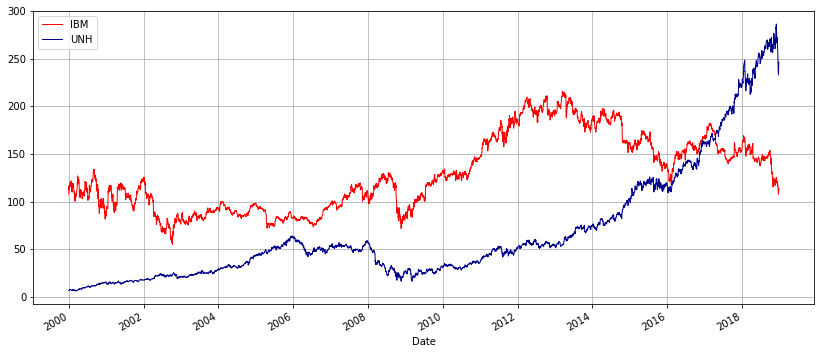

In [18]:
fig, axes = plt.subplots(1, 1, figsize=(14,6))
data["Close"].plot(ax = axes, grid = True, color = ["red","darkblue"], linewidth =1)
plt.show()

In [19]:
data.head()

Open                High                Low            \
                 IBM       UNH       IBM       UNH      IBM       UNH   
Date                                                                    
1999-12-31  109.1875  6.625000  109.5000  6.679688  106.625  6.617188   
2000-01-03  112.4375  6.640625  116.0000  6.757813  111.875  6.617188   
2000-01-04  114.0000  6.671875  114.5000  6.781250  110.875  6.617188   
2000-01-05  112.9375  6.640625  119.7500  6.773438  112.125  6.578125   
2000-01-06  118.0000  6.625000  118.9375  6.937500  113.500  6.609375   

               Close            Adj Close              Volume            
                 IBM       UNH        IBM       UNH       IBM       UNH  
Date                                                                     
1999-12-31  107.8750  6.640625  72.745613  5.679564   2870300   1234400  
2000-01-03  116.0000  6.718750  78.224693  5.746384  10347700   3431200  
2000-01-04  112.0625  6.632813  75.569450  5.672884   8227800   5997600  
2000-01-05  116.0000  6.617188  78.224693  5.659519  12733200  10562400  
2000-01-06  114.0000  6.859375  76.875992  5.866655   7971900  15300000

In [20]:
data.tail()

Open                    High                     Low  \
                   IBM         UNH         IBM         UNH         IBM   
Date                                                                     
2018-12-21  112.500000  240.729996  115.279999  247.500000  110.440002   
2018-12-24  109.900002  236.240005  111.000000  237.899994  107.500000   
2018-12-26  108.000000  232.699997  111.389999  243.369995  105.940002   
2018-12-27  109.989998  239.100006  113.779999  245.970001  109.470001   
2018-12-28  114.220001  246.710007  114.800003  249.789993  112.500000   

                             Close               Adj Close              \
                   UNH         IBM         UNH         IBM         UNH   
Date                                                                     
2018-12-21  237.449997  110.940002  238.339996  108.374962  237.433762   
2018-12-24  232.559998  107.570000  232.940002  105.082870  232.054291   
2018-12-26  231.809998  111.389999  243.350006  108.814552  242.424713   
2018-12-27  235.240005  113.779999  245.970001  111.149292  245.034744   
2018-12-28  244.809998  113.029999  246.240005  110.416634  245.303726   

              Volume            
                 IBM       UNH  
Date                            
2018-12-21  10386500  12209700  
2018-12-24   3821400   3091000  
2018-12-26   6645800   4159300  
2018-12-27   6045600   4295800  
2018-12-28   5117500   3312700

**Making a function for daily stock value change that works well on the data from Yahoo-Finance API**

In [21]:
def calc_changement_relatif(dataClose, debut_moins_1, debut, fin_moins_1, fin):
    return np.append(0,(dataClose[debut:fin].values - dataClose[debut_moins_1:fin_moins_1].values)
          /dataClose[debut_moins_1:fin_moins_1].values)

**Testing calculation of relative change of stock price, nice plot to see volatility of intra-day returns**

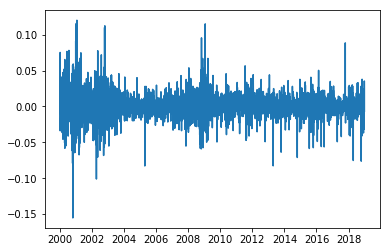

In [22]:
plt.plot(data.index,calc_changement_relatif(data["Close"][comp1],"1999-12-31","2000-01-03","2018-12-27","2018-12-28"))
plt.show()

**Adding relative change in price to dataFrame only containing close data as this is the only thing that interests us for the moment**

In [25]:
dataClose = data["Close"]

In [27]:
dataClose.index

DatetimeIndex(['1999-12-31', '2000-01-03', '2000-01-04', '2000-01-05',
               '2000-01-06', '2000-01-07', '2000-01-10', '2000-01-11',
               '2000-01-12', '2000-01-13',
               ...
               '2018-12-14', '2018-12-17', '2018-12-18', '2018-12-19',
               '2018-12-20', '2018-12-21', '2018-12-24', '2018-12-26',
               '2018-12-27', '2018-12-28'],
              dtype='datetime64[ns]', name='Date', length=4779, freq=None)

In [29]:
db_m_1 = dataClose.index[0]
db = dataClose.index[1]
fn_m_1 = dataClose.index[-2]
fn = dataClose.index[-1]

In [31]:
dataClose["Change" + comp1] = calc_changement_relatif(data["Close"][comp1],db_m_1,db,fn_m_1,fn)

In [32]:
dataClose["Change" + comp2] = calc_changement_relatif(data["Close"][comp2],db_m_1,db,fn_m_1,fn)

In [33]:
dataClose.head()

IBM       UNH  ChangeIBM  ChangeUNH
Date                                                
1999-12-31  107.8750  6.640625   0.000000   0.000000
2000-01-03  116.0000  6.718750   0.075319   0.011765
2000-01-04  112.0625  6.632813  -0.033944  -0.012791
2000-01-05  116.0000  6.617188   0.035137  -0.002356
2000-01-06  114.0000  6.859375  -0.017241   0.036600

In [34]:
dataClose.tail()

IBM         UNH  ChangeIBM  ChangeUNH
Date                                                    
2018-12-21  110.940002  238.339996  -0.018404  -0.016911
2018-12-24  107.570000  232.940002  -0.030377  -0.022657
2018-12-26  111.389999  243.350006   0.035512   0.044690
2018-12-27  113.779999  245.970001   0.021456   0.010766
2018-12-28  113.029999  246.240005  -0.006592   0.001098

**Combining two stocks**

In [36]:
def combine_stocks(dataClose, comp1, comp2, initinvest, arange, debut_moins_1, debut, fin_moins_1, fin):
    c1 = dataClose[comp2][debut_moins_1]/((dataClose[comp1][debut_moins_1]+dataClose[comp2][debut_moins_1]))
    r1 = c1/(dataClose[comp1][debut_moins_1]*c1)*initinvest
    c2 = dataClose[comp1][debut_moins_1]/(dataClose[comp2][debut_moins_1]+dataClose[comp1][debut_moins_1])
    r2 = c2/(dataClose[comp1][debut_moins_1]*c1)*initinvest
    for i in arange:
        dataClose[i] = i*r1*dataClose[comp1] + (1-i)*r2*dataClose[comp2]
        dataClose["Change"+str(i)] = calc_changement_relatif(dataClose[i],debut_moins_1,debut,fin_moins_1,fin)
    return dataClose

In [39]:
investment = 100
delta = np.arange(0,1.01,0.01)

In [44]:
dataClose = combine_stocks(dataClose,comp1,comp2,investment,delta,db_m_1,db,fn_m_1,fn)

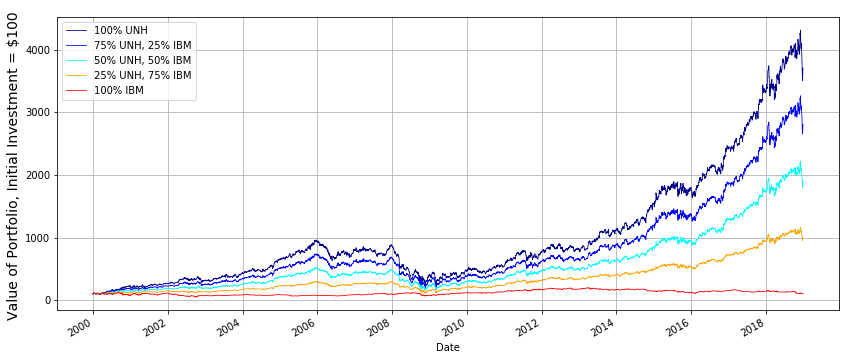

In [45]:
fig, axes = plt.subplots(1, 1, figsize=(14,6))
axes.grid(True)
dataClose[0].plot(ax = axes, grid = True,color = "darkblue", linewidth = 0.8, label = "100% UNH")
dataClose[0.25].plot(ax = axes, grid = True,color = "blue",linewidth = 0.8, label = "75% UNH, 25% IBM")
dataClose[0.5].plot(ax = axes, grid = True,color ='cyan',linewidth = 0.8,label = "50% UNH, 50% IBM")
dataClose[0.75].plot(ax = axes, grid = True,color = 'orange',linewidth = 0.8,label = "25% UNH, 75% IBM")
dataClose[1].plot(ax = axes, grid = True,color = "red",linewidth = 0.8, label = "100% IBM")
axes.legend(loc=2)
axes.set_ylabel("Value of Portfolio, Initial Investment = $100 ", size = 14)
plt.show()

In [46]:
alpha = 0.2

In [47]:
quantiles = np.zeros((0,1000))
for i in delta:
    quantiles = np.append(quantiles,np.quantile(dataClose["Change"+str(i)].values,alpha))

In [48]:
quantcomp1 = np.quantile(dataClose["Change"+comp1].values,alpha)
quantcomp2 = np.quantile(dataClose["Change"+comp2].values,alpha)

In [49]:
deltaquant = []
for i in delta:
    deltaquant.append(i*quantcomp1+(1-i)*quantcomp2)

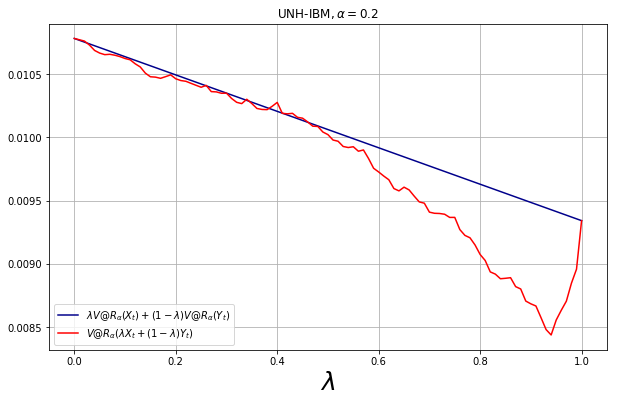

In [50]:
fig, axes = plt.subplots(1, 1, figsize=(10,6))
axes.grid(True)
axes.plot(delta,[ -x for x in deltaquant], color = "darkblue", label = r'$\lambda V@R_{\alpha}(X_{t}) + (1-\lambda )V@R_{\alpha}(Y_{t})$')
axes.plot(delta,[ -x for x in quantiles], color = 'red', label = r'$V@R_{\alpha} (\lambda X_{t}+(1-\lambda )Y_{t})$')
axes.set_xlabel('$\lambda$', size = 25)
axes.legend(loc=3)
plt.title(comp2+"-"+comp1+r'$, \alpha = $'+str(alpha))
plt.savefig("./Plots/V@R-"+comp2+"-"+comp1)
plt.show()

**AV@R**

In [51]:
yf.pdr_override() # <== that's all it takes :-)

comp1 = "IBM"

# download dataframe
data = pdr.get_data_yahoo(comp1, start="2000-01-01", end="2018-12-30")

[*********************100%***********************]  1 of 1 downloaded


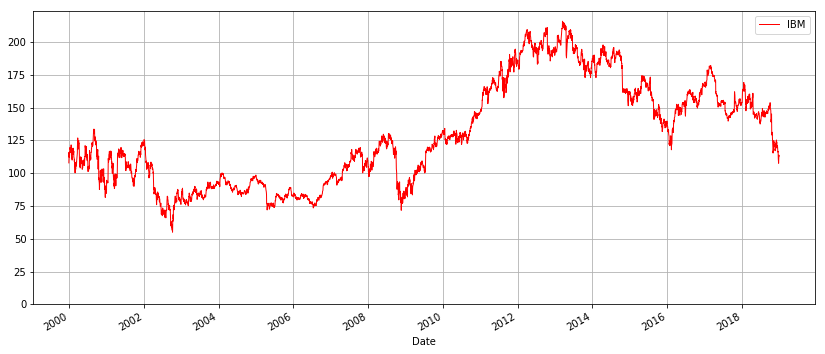

In [52]:
fig, axes = plt.subplots(1, 1, figsize=(14,6))
data["Close"].plot(ax = axes, grid = True, color = ["red","darkblue"], linewidth =1)
plt.legend([comp1])
plt.ylim(bottom=0)
plt.show()

In [55]:
dataClose = data["Close"]

In [56]:
db_m_1 = dataClose.index[0]
db = dataClose.index[1]
fn_m_1 = dataClose.index[-2]
fn = dataClose.index[-1]

In [60]:
Change = calc_changement_relatif(dataClose,db_m_1,db,fn_m_1,fn)

In [61]:
Change

array([ 0.        ,  0.07531866, -0.03394397, ...,  0.03551175,
        0.02145615, -0.00659167])

[]

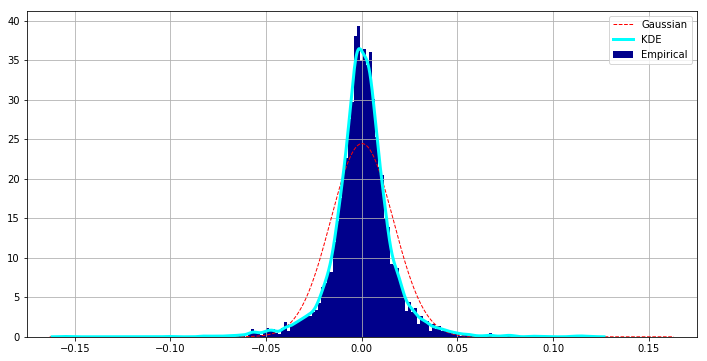

In [62]:
kde = sm.nonparametric.KDEUnivariate(Change)
kde.fit()
fig, axes = plt.subplots(1, 1, figsize=(12,6))
plt.hist(Change ,bins = 175, color = 'darkblue', density = True, label= "Real")
plt.grid(True)
plt.xlim([-0.175,0.175])

mean = np.mean(Change)
variance = np.var(Change)
sigma = np.std(Change)
x = np.linspace(-sigma*10, sigma*10, 1000)

axes.plot(x,norm.pdf(x,mean,sigma),lw = 1, color = 'red',ls = '--',label ="Gaussian")
axes.plot(kde.support, kde.density, lw=3,color = 'cyan', ls ='-', zorder=10, label ="KDE")
plt.legend(["Gaussian","KDE","Empirical"])
plt.plot()

[]

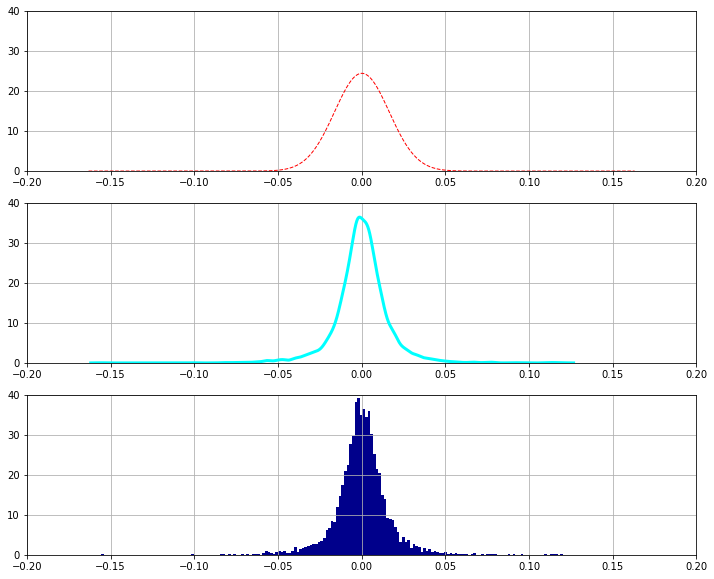

In [63]:
kde = sm.nonparametric.KDEUnivariate(Change)
kde.fit()
fig, axes = plt.subplots(3, 1, figsize=(12,10))
axes[0].grid(True)
axes[1].grid(True)
axes[2].grid(True)
axes[1].set_xlim([-0.2,0.2])
axes[0].set_xlim([-0.2,0.2])
axes[2].set_xlim([-0.2,0.2])

axes[1].set_ylim([0,40])
axes[0].set_ylim([0,40])
axes[2].set_ylim([0,40])

mean = np.mean(Change)
variance = np.var(Change)
sigma = np.std(Change)
x = np.linspace(-sigma*10, sigma*10, 1000)
axes[2] = plt.hist(Change ,bins = 175, color = 'darkblue', density = True, label= "Real")
axes[0].plot(x,norm.pdf(x,mean,sigma),lw = 1, color = 'red',ls = '--',label ="Gaussian")
axes[1].plot(kde.support, kde.density, lw=3,color = 'cyan', ls ='-', zorder=10, label ="KDE")
plt.plot()

In [64]:
import bisect
quantind = bisect.bisect(kde.cdf,0.05)

[]

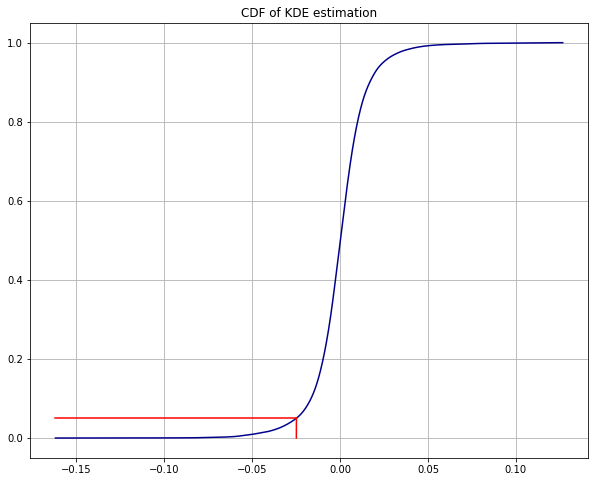

In [66]:
fig, axes = plt.subplots(1, 1, figsize=(10,8))
plt.plot(kde.support,kde.cdf, color = 'darkblue')
plt.plot([kde.support[quantind],kde.support[quantind+1]],[0,kde.cdf[quantind]], color = 'red')
plt.plot([kde.support[0],kde.support[quantind]],[0.05,0.05], color = 'red')
plt.grid(True)
plt.title("CDF of KDE estimation")
plt.plot()

[]

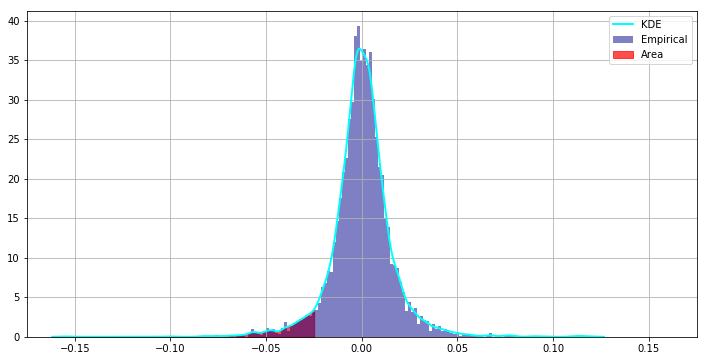

In [67]:
fig, axes = plt.subplots(1, 1, figsize=(12,6))
plt.hist(Change ,bins = 175, color = 'darkblue', density = True, label= "Real", alpha = 0.5)
axes.plot(kde.support, kde.density, lw=2,color = 'cyan', ls ='-', zorder=10, label ="KDE")
plt.fill_between(kde.support[0:quantind],kde.density[0:quantind],0, color = "red",alpha=0.7)
plt.legend(["KDE","Empirical","Area"])
axes.set_xlim([-0.175,0.175])
plt.grid(True)
plt.plot()

In [68]:
AVAR=np.trapz(kde.support[0:quantind],kde.cdf[0:quantind])/0.05

[]

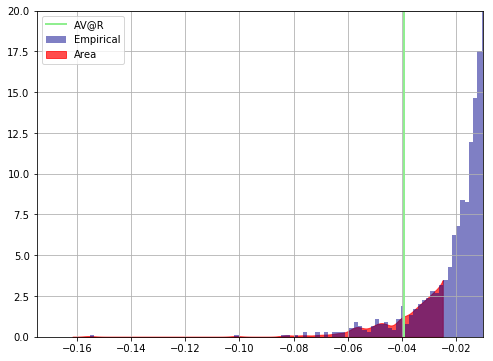

In [69]:
fig, axes = plt.subplots(1, 1, figsize=(8,6))
plt.hist(Change ,bins = 175, color = 'darkblue', density = True, label= "Real", alpha = 0.5)
#axes.plot(kde.support, kde.density, lw=2,color = 'cyan', ls ='-', zorder=10, label ="KDE")
plt.fill_between(kde.support[0:quantind],kde.density[0:quantind],0, color = "red",alpha=0.7)
axes.plot([AVAR,AVAR],[0,20], color = 'lightgreen', lw = 2)
plt.legend(["AV@R","Empirical","Area"])
axes.set_xlim([-0.175,-0.01])
axes.set_ylim([0,20])
plt.grid(True)
plt.plot()